In [78]:
import pandas as pd

In [79]:
#load dataset
def load_data():
    data = pd.read_excel('datalatih200.xlsx')
    # Jika X_test berasal dari TF-IDF, kita perlu mengakses data asli
    pd.set_option('display.max_colwidth', None)
    return data
data = load_data()
selected_columns = ['rating', 'stemming']
selected_data = data[selected_columns]
data = selected_data
data

rating  \
0          1   
1          1   
2          1   
3          1   
4          1   
...      ...   
1502       5   
1503       5   
1504       5   
1505       5   
1506       5   

                                                                                                                                                                                                                                                        stemming  
0                                                  ['kurang', 'kawasan', 'jual', 'tipu', 'banyak', 'oknum', 'toko', 'tipu', 'unggah', 'jual', 'aplikasi', 'korban', 'susah', 'lapor', 'cs', 'cs', 'email', 'hubung', 'wa', 'pakai', 'nomor', 'telepon', 'rumah']  
1                                                                                           ['bangkai', 'kembali', 'dana', 'proses', 'mnggu', 'kecil', 'nilai', 'profesional', 'tanya', 'jawab', 'sedang', 'kece', 'tunggu', 'bangkai', 'aplikasi', 'uninstall']  
2     ['aplikasi', 'suai', 'iklan', 'amanah', 'bilang', 'kirim', 'tepat', 'nyataa', 'contoh', 'kira', 'tiba', 'tanggal', 'bila', 'tanggal', 'kompensasi', 'nyata', 'sistem', 'rubah', 'tanggal', 'kira', 'tanggal', 'nam', 'tipu', 'mau', 'bayar', 'kompensasi']  
3                                                                                                    ['tidak jelas', 'masa', 'abis', 'co', 'barang', 'bayar', 'jam', 'shopeee', 'time', 'payment', 'jam', 'barang tersebut', 'pasar', 'smua', 'cuih', 'gajelas']  
4                                                                                                                                                                ['muncul', 'aktivitas', 'curiga', 'co', 'harga', 'nyaman', 'rugi', 'kasih', 'voucher', 'pakai']  
...                                                                                                                                                                                                                                                          ...  
1502                                                                                                                                                              ['aplikasi', 'keren', 'nie', 'ribet', 'mudah', 'faham', 'terima kasih', 'tingkat', 'kualitas']  
1503                                                                                                                                                                                                      ['tingkat', 'diskon', 'lalu', 'mahal', 'ongkos kirim']  
1504                                                                                                                                                                                ['aplikasi', 'bantu', 'beli', 'butuh', 'rumah', 'harga', 'ramah', 'kantong']  
1505                                                                                                                                                                                                                                          ['sukses', 'baik']  
1506                                                                                                                                                                                               ['aplikasi', 'bantu', 'belanja', 'mudah', 'murah', 'efektif']  

[1507 rows x 2 columns]

In [80]:
#pisahkan kolom fitur dan target
X = data['stemming']
y = data['rating']

In [81]:
import math
# Langkah 1: Tokenisasi
def tokenize(doc):
    return [word.strip() for word in doc.strip("[]").replace("'", "").split(", ")]

# Tokenisasi seluruh dokumen
documents = [tokenize(doc) for doc in X]

# Langkah 2: Membuat vocabulary (daftar term unik)
vocabulary = sorted(set(word for doc in documents for word in doc))

# Langkah 3: Hitung Term Frequency (TF)
def compute_tf(doc, vocabulary):
    n = len(doc)  # Total jumlah kata dalam dokumen
    tf = {term: doc.count(term) / n for term in vocabulary}
    return tf

tf_matrix = [compute_tf(doc, vocabulary) for doc in documents]

# Langkah 4: Hitung Inverse Document Frequency (IDF)
def compute_idf(vocabulary, documents):
    N = len(documents)  # Jumlah dokumen keseluruhan
    idf = {}
    for term in vocabulary:
        df = sum(1 for doc in documents if term in doc)  # Jumlah dokumen yang mengandung term
        idf[term] = math.log((N + 1) / (df + 1)) + 1  # Rumus IDF dengan smoothing
    return idf

idf = compute_idf(vocabulary, documents)

# Langkah 5: Hitung TF-IDF
def compute_tfidf(tf, idf):
    tfidf = {term: tf[term] * idf[term] for term in vocabulary}
    return tfidf

tfidf_matrix = [compute_tfidf(tf, idf) for tf in tf_matrix]

# Langkah 6: Membuat DataFrame untuk TF-IDF
df_tfidf = pd.DataFrame(tfidf_matrix, columns=vocabulary)

# Menampilkan DataFrame TF-IDF
df_tfidf

Lazada PayLater  Lazada Paylater    a  aamiin  abai  abal  abank  \
0     0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
1     0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
2     0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
3     0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
4     0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
...   ...              ...              ...  ...     ...   ...   ...    ...   
1502  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
1503  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
1504  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
1505  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
1506  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   

      abdet      abis  ...   yt  yth  yuhu  yuk  yutube  yword    z  zaman  \
0       0.0  0.000000  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   
1       0.0  0.000000  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   
2       0.0  0.000000  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   
3       0.0  0.433265  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   
4       0.0  0.000000  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   
...     ...       ...  ...  ...  ...   ...  ...     ...    ...  ...    ...   
1502    0.0  0.000000  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   
1503    0.0  0.000000  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   
1504    0.0  0.000000  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   
1505    0.0  0.000000  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   
1506    0.0  0.000000  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   

      zolim  zonk  
0       0.0   0.0  
1       0.0   0.0  
2       0.0   0.0  
3       0.0   0.0  
4       0.0   0.0  
...     ...   ...  
1502    0.0   0.0  
1503    0.0   0.0  
1504    0.0   0.0  
1505    0.0   0.0  
1506    0.0   0.0  

[1507 rows x 3543 columns]

In [82]:
import joblib

# Simpan vocabulary dan IDF menggunakan joblib
joblib.dump(vocabulary, 'vocabulary.pkl')
joblib.dump(idf, 'idf.pkl')


['idf.pkl']

In [83]:
# df_tfidf.to_excel('hasiltdidf.xlsx')

In [84]:
# Memisahkan fitur (X) dan label (y)
X = df_tfidf # Fitur hasil ekstraksi TF-IDF
y = y     # Label kategori/class dari data

# Mengubah nilai rating menjadi label kategori/class
y = y.apply(lambda x: 'negatif' if x in [1, 2] else ('netral' if x == 3 else 'positif'))
# y = y.apply(lambda x: 'positif' if x in [4, 5] else ('negatif' if x in [1, 2] else None))

In [85]:
import numpy as np
def manual_train_test_split(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    split_idx = int(len(X) * (1 - test_size))
    train_indices = indices[:split_idx]
    test_indices = indices[split_idx:]
    
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = manual_train_test_split(X, y, test_size=0.3, random_seed=42)

# Menyimpan data latih dan uji ke file Excel
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# # Simpan ke file Excel baru
# train_data.to_excel('train_data.xlsx', index=False)
# test_data.to_excel('test_data.xlsx', index=False)

In [86]:
train_data

Lazada PayLater  Lazada Paylater    a  aamiin  abai  abal  abank  \
578   0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
1146  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
382   0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
583   0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
966   0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
...   ...              ...              ...  ...     ...   ...   ...    ...   
1435  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
969   0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
604   0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
1441  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
89    0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   

      abdet  abis  ...  yth  yuhu  yuk  yutube  yword    z  zaman  zolim  \
578     0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   
1146    0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   
382     0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   
583     0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   
966     0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   
...     ...   ...  ...  ...   ...  ...     ...    ...  ...    ...    ...   
1435    0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   
969     0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   
604     0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   
1441    0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   
89      0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   

      zonk   rating  
578    0.0   netral  
1146   0.0  negatif  
382    0.0  negatif  
583    0.0   netral  
966    0.0  positif  
...    ...      ...  
1435   0.0  positif  
969    0.0  positif  
604    0.0  positif  
1441   0.0  positif  
89     0.0  negatif  

[1054 rows x 3544 columns]

In [87]:
test_data

Lazada PayLater  Lazada Paylater    a  aamiin  abai  abal  abank  \
848   0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
1151  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
1440  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
753   0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
498   0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
...   ...              ...              ...  ...     ...   ...   ...    ...   
1130  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
1294  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
860   0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
1459  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
1126  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   

      abdet  abis  ...  yth  yuhu  yuk  yutube  yword    z  zaman  zolim  \
848     0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   
1151    0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   
1440    0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   
753     0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   
498     0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   
...     ...   ...  ...  ...   ...  ...     ...    ...  ...    ...    ...   
1130    0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   
1294    0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   
860     0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   
1459    0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   
1126    0.0   0.0  ...  0.0   0.0  0.0     0.0    0.0  0.0    0.0    0.0   

      zonk   rating  
848    0.0  positif  
1151   0.0  negatif  
1440   0.0  positif  
753    0.0  positif  
498    0.0   netral  
...    ...      ...  
1130   0.0  negatif  
1294   0.0   netral  
860    0.0  positif  
1459   0.0  positif  
1126   0.0  negatif  

[453 rows x 3544 columns]

In [88]:
# Parameter MKNN
k = 9
alpha = 0.5 
threshold = 0.7

In [89]:
import numpy as np

def mknn(training_data, training_labels, test_data, k, alpha, threshold):
    """
    Implementasi algoritma MKNN.
    """
    def cosine_similarity_vector(v, w):
        return np.dot(v, w) / (np.linalg.norm(v) * np.linalg.norm(w) + 1e-8)

    def calculate_validity(training_data, training_labels, k, threshold):
        n = len(training_data)
        validities = np.zeros(n)
        H = k

        for i in range(n):
            print(f"\n--- Menghitung validitas untuk dokumen {i} ---")

            # Menghitung Cosine Similarity suatu dokumen dengan semua dokumen di data latih 
            distances = []
            for j in range(n):
                if i != j:
                    sim = cosine_similarity_vector(training_data[i], training_data[j])
                    distances.append(sim)
                else:
                    distances.append(-np.inf)  # Agar dokumen sendiri tidak dihitung sebagai tetangga

            # Mengurutkan nilai k tetangga terdekat yang tertinggi
            neighbors_indices = np.argsort(distances)[-k:]
            print(f"Tetangga terdekat untuk dokumen {i}: {neighbors_indices}")

            # Cetak Cosine Similarity untuk tetangga terdekat
            for idx in neighbors_indices:
                print(f"Cosine Similarity (Doc {i} vs Doc {idx}): {distances[idx]:.4f}")

            # Hitung jumlah tetangga dengan kelas yang sama
            count_same_class = sum(
                1 for idx in neighbors_indices if training_labels[idx] == training_labels[i]
            )

            # Hitung nilai validitas
            validities[i] = (1 / H) * count_same_class

            # Evaluasi berdasarkan threshold
            if validities[i] >= threshold:
                print(f"Dokumen {i} valid (validitas: {validities[i]:.4f} >= threshold: {threshold:.4f})")
            else:
                print(f"Dokumen {i} tidak valid (validitas: {validities[i]:.4f} < threshold: {threshold:.4f})")

        return validities

    # Langkah 1: Hitung validitas data latih
    validities = calculate_validity(training_data, training_labels, k, threshold)

    predictions = []

    # Langkah 2: Hitung cosine similarity suatu dokumen di data uji dengan semua dokumen di data latih
    for i, test_instance in enumerate(test_data):
        print(f"\n--- Menghitung weighted voting untuk dokumen uji {i} ---")

        # Hitung cosine similarity antara dokumen uji dengan semua dokumen latih
        distances = [cosine_similarity_vector(test_instance, train_instance) for train_instance in training_data]

        # Pilih k tetangga terdekat
        neighbors_indices = np.argsort(distances)[-k:]
        print(f"Tetangga terdekat untuk dokumen uji {i}: {neighbors_indices}")

        # Cetak cosine similarity untuk tetangga terdekat
        for idx in neighbors_indices:
            print(f"Cosine Similarity (Doc Uji {i} vs Doc Latih {idx}): {distances[idx]:.4f}")

        # Hitung weighted voting
        weighted_votes = {}
        for idx in neighbors_indices:
            weight = validities[idx] * (1 / (distances[idx] + alpha))
            label = training_labels[idx]
            if label in weighted_votes:
                weighted_votes[label] += weight
            else:
                weighted_votes[label] = weight
            print(f"Weighted Vote (Label {label}): {weight:.4f}")

        # Prediksi kelas berdasarkan voting
        if weighted_votes:
            predicted_class = max(weighted_votes, key=weighted_votes.get)
        else:
            predicted_class = None  # Jika tidak ada validitas, default None atau kelas lain
        predictions.append(predicted_class)
        print(f"Prediksi kelas untuk dokumen uji {i}: {predicted_class}")

    return predictions


In [90]:
# Prediksi menggunakan MKNN
y_pred = mknn(np.array(X_train), np.array(y_train), np.array(X_test), k, alpha, threshold)


--- Menghitung validitas untuk dokumen 0 ---
Tetangga terdekat untuk dokumen 0: [558 186 621 386 737  35 382 482 747]
Cosine Similarity (Doc 0 vs Doc 558): 0.1594
Cosine Similarity (Doc 0 vs Doc 186): 0.1647
Cosine Similarity (Doc 0 vs Doc 621): 0.1682
Cosine Similarity (Doc 0 vs Doc 386): 0.1709
Cosine Similarity (Doc 0 vs Doc 737): 0.1830
Cosine Similarity (Doc 0 vs Doc 35): 0.1962
Cosine Similarity (Doc 0 vs Doc 382): 0.2027
Cosine Similarity (Doc 0 vs Doc 482): 0.2211
Cosine Similarity (Doc 0 vs Doc 747): 0.2337
Dokumen 0 tidak valid (validitas: 0.6667 < threshold: 0.7000)

--- Menghitung validitas untuk dokumen 1 ---
Tetangga terdekat untuk dokumen 1: [1044  929  258  922   66  119    6  765  207]
Cosine Similarity (Doc 1 vs Doc 1044): 0.2498
Cosine Similarity (Doc 1 vs Doc 929): 0.2510
Cosine Similarity (Doc 1 vs Doc 258): 0.2512
Cosine Similarity (Doc 1 vs Doc 922): 0.2554
Cosine Similarity (Doc 1 vs Doc 66): 0.2667
Cosine Similarity (Doc 1 vs Doc 119): 0.2774
Cosine Similarity

Tetangga terdekat untuk dokumen 5: [410 299 950 685 818 922 660 216 415]
Cosine Similarity (Doc 5 vs Doc 410): 0.1720
Cosine Similarity (Doc 5 vs Doc 299): 0.1792
Cosine Similarity (Doc 5 vs Doc 950): 0.1926
Cosine Similarity (Doc 5 vs Doc 685): 0.1989
Cosine Similarity (Doc 5 vs Doc 818): 0.2036
Cosine Similarity (Doc 5 vs Doc 922): 0.2059
Cosine Similarity (Doc 5 vs Doc 660): 0.2077
Cosine Similarity (Doc 5 vs Doc 216): 0.2305
Cosine Similarity (Doc 5 vs Doc 415): 0.2602
Dokumen 5 valid (validitas: 0.8889 >= threshold: 0.7000)

--- Menghitung validitas untuk dokumen 6 ---
Tetangga terdekat untuk dokumen 6: [ 299  571 1044    1  127  598 1052  119  485]
Cosine Similarity (Doc 6 vs Doc 299): 0.2608
Cosine Similarity (Doc 6 vs Doc 571): 0.2624
Cosine Similarity (Doc 6 vs Doc 1044): 0.2640
Cosine Similarity (Doc 6 vs Doc 1): 0.2941
Cosine Similarity (Doc 6 vs Doc 127): 0.3020
Cosine Similarity (Doc 6 vs Doc 598): 0.3152
Cosine Similarity (Doc 6 vs Doc 1052): 0.3196
Cosine Similarity (Doc

In [91]:
# Pastikan y_pred dan y_test adalah Pandas Series
y_pred = pd.Series(y_pred, index=y_test.index)  # Sinkronkan indeks dengan y_test
y_test = pd.Series(y_test)

# Hitung jumlah data yang berhasil dan salah diprediksi model
prediksi_benar = (y_pred == y_test).sum()
prediksi_salah = (y_pred != y_test).sum()

# Menghitung jumlah data positif, negatif, dan netral pada data uji
positif_count = (y_test == 'positif').sum()
negatif_count = (y_test == 'negatif').sum()
netral_count = (y_test == 'netral').sum()

# Menghitung jumlah data positif, negatif, dan netral pada data latih
positif_count_t = (y_train == 'positif').sum()
negatif_count_t = (y_train == 'negatif').sum()
netral_count_t = (y_train == 'netral').sum()

# Menghitung jumlah data positif, negatif, dan netral pada prediksi
prediksi_positif = (y_pred == 'positif').sum()
prediksi_negatif = (y_pred == 'negatif').sum()
prediksi_netral = (y_pred == 'netral').sum()

# Mencetak jumlah data positif, negatif, dan netral pada data latih
print("Jumlah data latih positif :", positif_count_t)
print("Jumlah data latih negatif :", negatif_count_t)
print("Jumlah data latih netral  :", netral_count_t)

# Mencetak jumlah data positif, negatif, dan netral pada data uji
print("Jumlah data uji positif :", positif_count)
print("Jumlah data uji negatif :", negatif_count)
print("Jumlah data uji netral  :", netral_count)

# Mencetak jumlah prediksi benar dan salah
print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

# Mencetak jumlah prediksi positif, negatif, dan netral
print('Jumlah prediksi positif\t:', prediksi_positif)
print('Jumlah prediksi negatif\t:', prediksi_negatif)
print('Jumlah prediksi netral\t:', prediksi_netral)

# Menghitung dan mencetak akurasi
akurasi = prediksi_benar / (prediksi_benar + prediksi_salah)
print('Akurasi Pengujian\t:', akurasi)


Jumlah data latih positif : 417
Jumlah data latih negatif : 426
Jumlah data latih netral  : 211
Jumlah data uji positif : 191
Jumlah data uji negatif : 173
Jumlah data uji netral  : 89
Jumlah prediksi benar	: 358
Jumlah prediksi salah	: 95
Jumlah prediksi positif	: 197
Jumlah prediksi negatif	: 181
Jumlah prediksi netral	: 75
Akurasi Pengujian	: 0.7902869757174393


In [92]:
# Menghitung Precision, Recall, F1-Score, dan Akurasi per kelas
def calculate_metrics_per_class(y_test, y_pred, label):
    TP = ((y_test == label) & (y_pred == label)).sum()
    FP = ((y_test != label) & (y_pred == label)).sum()
    FN = ((y_test == label) & (y_pred != label)).sum()
    TN = ((y_test != label) & (y_pred != label)).sum()
    
    precision = TP / (TP + FP) if TP + FP > 0 else 0
    recall = TP / (TP + FN) if TP + FN > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    
    return TP, FP, FN, TN, precision, recall, f1_score

# Perhitungan untuk setiap kelas
labels = ['positif', 'negatif', 'netral']
TP_total = FP_total = FN_total = TN_total = 0

for label in labels:
    TP, FP, FN, TN, precision, recall, f1_score = calculate_metrics_per_class(y_test, y_pred, label)
    TP_total += TP
    FP_total += FP
    FN_total += FN
    TN_total += TN
    
    print(f"\nKelas: {label}")
    print(f" TN              FP")
    print(f"{TN}            {FP}")
    print(f" FN               TP")
    print(f"{FN}             {TP}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}")

# Menghitung Akurasi berdasarkan rumus: (TP + TN) / (TP + TN + FP + FN)
akurasi = (TP_total + TN_total) / (TP_total + TN_total + FP_total + FN_total)
print("\nAkurasi Pengujian : {:.4f}".format(akurasi))

# Menghitung rata-rata metrik untuk semua kelas
precision_avg = np.mean([calculate_metrics_per_class(y_test, y_pred, label)[4] for label in labels])
recall_avg = np.mean([calculate_metrics_per_class(y_test, y_pred, label)[5] for label in labels])
f1_score_avg = np.mean([calculate_metrics_per_class(y_test, y_pred, label)[6] for label in labels])

print("Rata-rata Precision: {:.4f}".format(precision_avg))
print("Rata-rata Recall: {:.4f}".format(recall_avg))
print("Rata-rata F1-Score: {:.4f}".format(f1_score_avg))



Kelas: positif
 TN              FP
226            36
 FN               TP
30             161
Precision: 0.8173, Recall: 0.8429, F1-Score: 0.8299

Kelas: negatif
 TN              FP
238            42
 FN               TP
34             139
Precision: 0.7680, Recall: 0.8035, F1-Score: 0.7853

Kelas: netral
 TN              FP
347            17
 FN               TP
31             58
Precision: 0.7733, Recall: 0.6517, F1-Score: 0.7073

Akurasi Pengujian : 0.8602
Rata-rata Precision: 0.7862
Rata-rata Recall: 0.7660
Rata-rata F1-Score: 0.7742


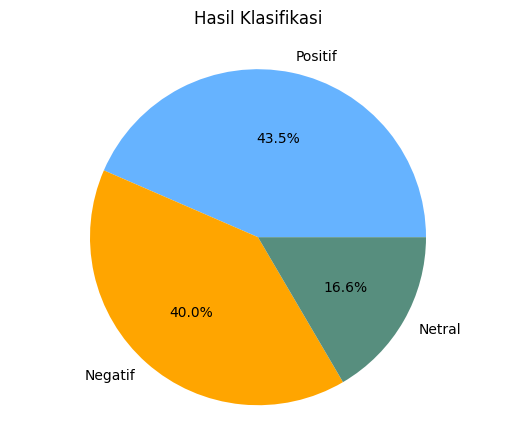

In [93]:
import matplotlib.pyplot as plt

# Data untuk visualisasi
labels = ['Positif', 'Negatif', 'Netral']
sizes = [prediksi_positif, prediksi_negatif, prediksi_netral]
colors = ['#66B3FF', '#FFA500', '#578E7E']  # Warna biru dan oranye

# Membuat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Hasil Klasifikasi\n')

# Menampilkan plot
plt.axis('equal')
plt.show()


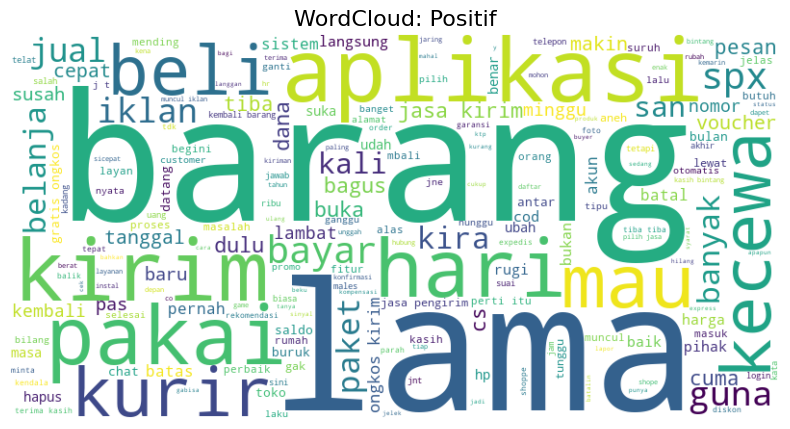

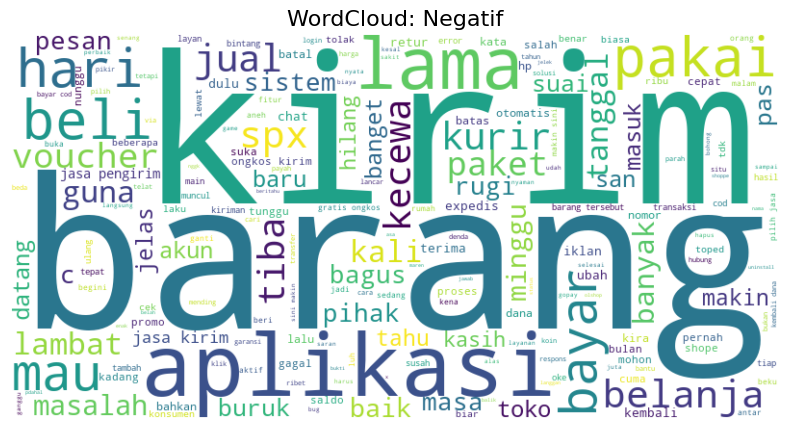

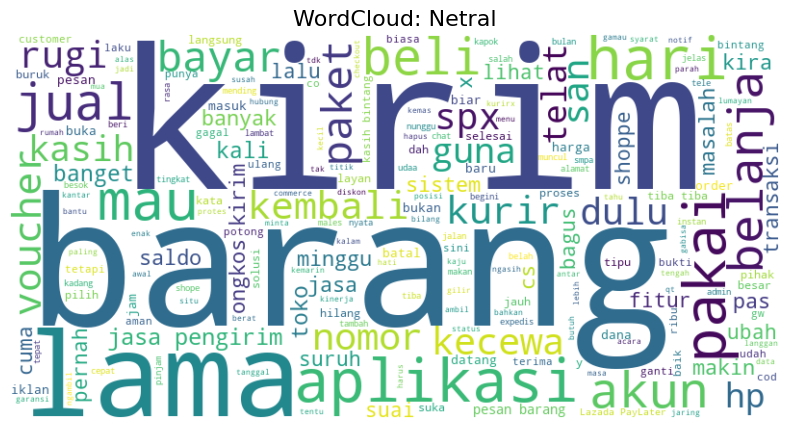

In [94]:
from wordcloud import WordCloud

# Gabungkan teks untuk setiap label
def generate_wordcloud(data, label, title):
    text = " ".join([" ".join(doc) for doc, lbl in zip(documents, y_test) if lbl == label])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    
    # Tampilkan WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# WordCloud untuk data uji positif
generate_wordcloud(documents, 'positif', 'WordCloud: Positif')

# WordCloud untuk data uji negatif
generate_wordcloud(documents, 'negatif', 'WordCloud: Negatif')

# WordCloud untuk data uji netral
generate_wordcloud(documents, 'netral', 'WordCloud: Netral')


In [95]:
import joblib
joblib.dump(mknn, 'mknn.pkl')

['mknn.pkl']

In [96]:
import pandas as pd
# Fungsi untuk memuat data uji baru
def load_new_test_data(file_path):
    """
    Memuat data uji baru dari file Excel yang hanya memiliki kolom 'stemming'.
    """
    new_test_data = pd.read_excel(file_path)
    if 'stemming' not in new_test_data.columns:
        raise ValueError("File harus memiliki kolom 'stemming'")
    return new_test_data['stemming']

# Contoh penggunaan fungsi load_new_test_data
file_path = 'tes_model_dataset_stemming.xlsx'  # Ganti dengan nama file data uji baru Anda
X_new_test = load_new_test_data(file_path)



In [97]:
# Langkah 1: Tokenisasi
def tokenize(doc):
    # Menghapus tanda petik, strip spasi ekstra, dan mengonversi string menjadi list kata
    return [word.strip("'").strip() for word in doc.replace("'", "").strip("[]").split(", ")]

# Tokenisasi data uji baru
new_documents = [tokenize(doc) for doc in X_new_test]


# Transformasi data uji baru ke TF-IDF
def transform_to_tfidf(documents, vocabulary, idf):
    """
    Mengubah dokumen menjadi representasi TF-IDF berdasarkan vocabulary dan IDF yang ada.
    """
    tf_matrix = [compute_tf(doc, vocabulary) for doc in documents]
    tfidf_matrix = [compute_tfidf(tf, idf) for tf in tf_matrix]
    return pd.DataFrame(tfidf_matrix, columns=vocabulary)

df_new_test_tfidf = transform_to_tfidf(new_documents, vocabulary, idf)

df_new_test_tfidf

Lazada PayLater  Lazada Paylater    a  aamiin  abai  abal  abank  \
0    0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
1    0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
2    0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
3    0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
4    0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
..   ...              ...              ...  ...     ...   ...   ...    ...   
195  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
196  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
197  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
198  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   
199  0.0              0.0              0.0  0.0     0.0   0.0   0.0    0.0   

     abdet      abis  ...   yt  yth  yuhu  yuk  yutube  yword    z  zaman  \
0      0.0  0.000000  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   
1      0.0  0.000000  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   
2      0.0  0.000000  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   
3      0.0  0.433265  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   
4      0.0  0.000000  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   
..     ...       ...  ...  ...  ...   ...  ...     ...    ...  ...    ...   
195    0.0  0.000000  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   
196    0.0  0.000000  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   
197    0.0  0.000000  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   
198    0.0  0.000000  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   
199    0.0  0.000000  ...  0.0  0.0   0.0  0.0     0.0    0.0  0.0    0.0   

     zolim  zonk  
0      0.0   0.0  
1      0.0   0.0  
2      0.0   0.0  
3      0.0   0.0  
4      0.0   0.0  
..     ...   ...  
195    0.0   0.0  
196    0.0   0.0  
197    0.0   0.0  
198    0.0   0.0  
199    0.0   0.0  

[200 rows x 3543 columns]

In [98]:
# Lakukan prediksi menggunakan model MKNN
y_new_pred = mknn(
    np.array(X_train),  # Data latih dalam format TF-IDF
    np.array(y_train),  # Label data latih
    np.array(df_new_test_tfidf),  # Data uji baru dalam format TF-IDF
    k, alpha, threshold
)



--- Menghitung validitas untuk dokumen 0 ---
Tetangga terdekat untuk dokumen 0: [558 186 621 386 737  35 382 482 747]
Cosine Similarity (Doc 0 vs Doc 558): 0.1594
Cosine Similarity (Doc 0 vs Doc 186): 0.1647
Cosine Similarity (Doc 0 vs Doc 621): 0.1682
Cosine Similarity (Doc 0 vs Doc 386): 0.1709
Cosine Similarity (Doc 0 vs Doc 737): 0.1830
Cosine Similarity (Doc 0 vs Doc 35): 0.1962
Cosine Similarity (Doc 0 vs Doc 382): 0.2027
Cosine Similarity (Doc 0 vs Doc 482): 0.2211
Cosine Similarity (Doc 0 vs Doc 747): 0.2337
Dokumen 0 tidak valid (validitas: 0.6667 < threshold: 0.7000)

--- Menghitung validitas untuk dokumen 1 ---
Tetangga terdekat untuk dokumen 1: [1044  929  258  922   66  119    6  765  207]
Cosine Similarity (Doc 1 vs Doc 1044): 0.2498
Cosine Similarity (Doc 1 vs Doc 929): 0.2510
Cosine Similarity (Doc 1 vs Doc 258): 0.2512
Cosine Similarity (Doc 1 vs Doc 922): 0.2554
Cosine Similarity (Doc 1 vs Doc 66): 0.2667
Cosine Similarity (Doc 1 vs Doc 119): 0.2774
Cosine Similarity

In [99]:
# Menyimpan hasil prediksi ke file Excel
df_new_test_result = pd.DataFrame({
    'Data Uji Baru': X_new_test,
    'Label Prediksi':y_new_pred
})
df_new_test_result.to_excel('hasil_prediksi_data_uji_baru.xlsx', index=False)

Jumlah prediksi positif	: 93
Jumlah prediksi negatif	: 78
Jumlah prediksi netral	: 29


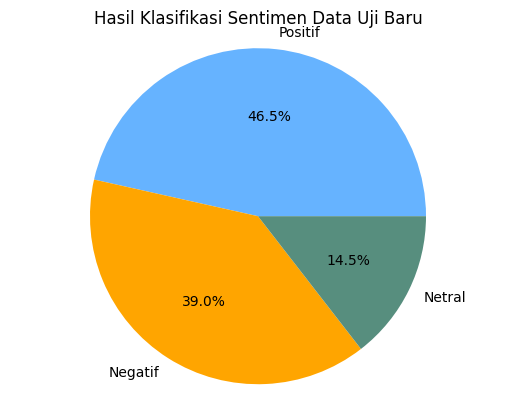

In [100]:
# Menghitung jumlah prediksi untuk setiap sentimen
prediksi_positif_new = (np.array(y_new_pred) == 'positif').sum()
prediksi_negatif_new = (np.array(y_new_pred) == 'negatif').sum()
prediksi_netral_new = (np.array(y_new_pred) == 'netral').sum()

# Mencetak jumlah prediksi positif, negatif, dan netral
print('Jumlah prediksi positif\t:', prediksi_positif_new)
print('Jumlah prediksi negatif\t:', prediksi_negatif_new)
print('Jumlah prediksi netral\t:', prediksi_netral_new)

# Data untuk visualisasi
labels = ['Positif', 'Negatif', 'Netral']
sizes = [prediksi_positif_new, prediksi_negatif_new, prediksi_netral_new]
colors = ['#66B3FF', '#FFA500', '#578E7E']  # Warna biru, oranye, dan hijau

# Membuat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Hasil Klasifikasi Sentimen Data Uji Baru')

# Menampilkan plot
plt.axis('equal')
plt.show()


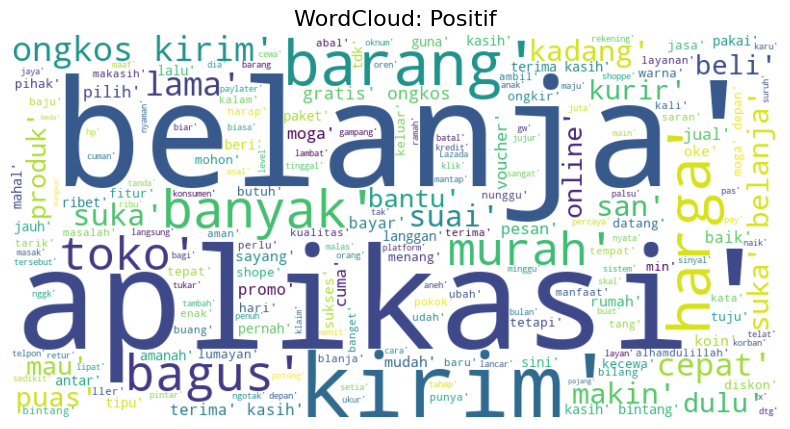

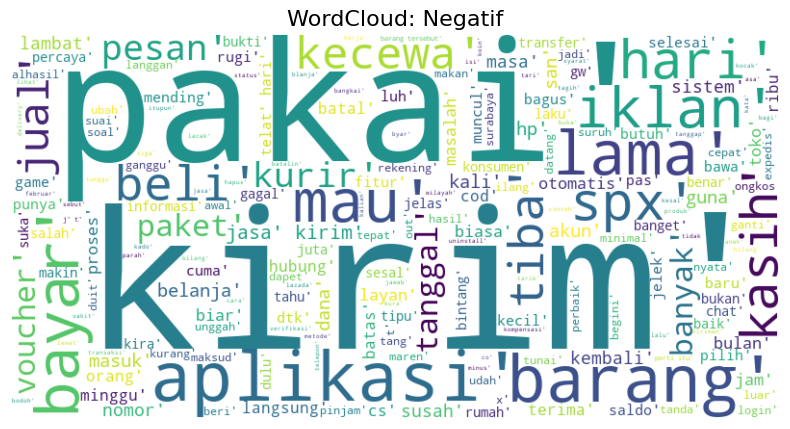

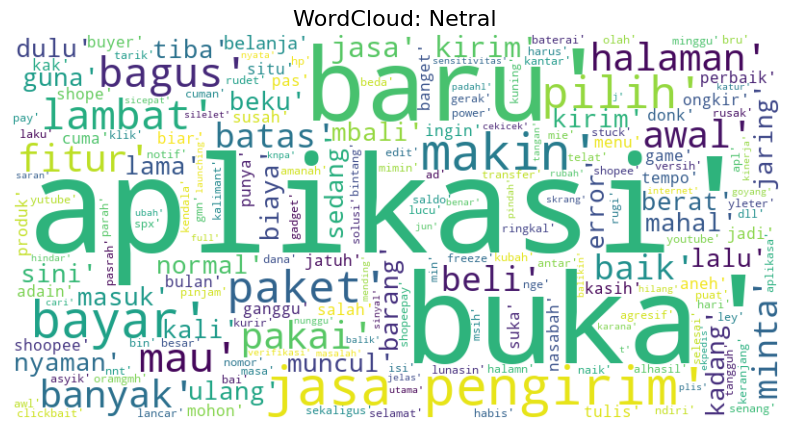

In [101]:
# Fungsi untuk membuat WordCloud berdasarkan label sentimen
def generate_wordcloud(data, labels, label, title):
    text = " ".join([doc for doc, lbl in zip(data, labels) if lbl == label])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    
    # Tampilkan WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# WordCloud untuk data uji positif
generate_wordcloud(X_new_test, y_new_pred, 'positif', 'WordCloud: Positif')

# WordCloud untuk data uji negatif
generate_wordcloud(X_new_test, y_new_pred, 'negatif', 'WordCloud: Negatif')

# WordCloud untuk data uji netral
generate_wordcloud(X_new_test, y_new_pred, 'netral', 'WordCloud: Netral')